# Problem statement

### Bike sharing assignment

### A US bike-sharing provider BoomBikes contracts a consulting company to understand the demands for their bike share business. 

#### Essentially they are interested in below
 - Significant vairables in predicting demand
 - How well those vairables describe the bike demand

 

# High level approach

- Understand and clean up the data
- EDA and inferences
- Data preparation
- Splitting data into training and test sets
- Build model 
- Residual analysis  
- Making predictions
- Evalute the model 
- Conclusion

## Understand the data

#### Importing all the libraries to perform the model building

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodel libraries 
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sci kit learn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# loading the data
bike = pd.read_csv("day.csv")

In [3]:
# Lets check the data 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# checking for null values 
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No null values to handle 

In [6]:
# renaming few columns for better readibility
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [7]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping instant as it is just the index of the record
# Dropping casual and registered as the target column 'cnt' has the summation already
# Dropping dteday as we have year and month already
bike.drop(['instant','casual','registered', 'dteday'],axis=1,inplace=True)

#### P.S. temp and atemp looks similiar but will check VIF and consider to keep them or not 

In [9]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Assigning categorical values from interpretred numerical values based on dat dictionary 
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

bike.weekday = bike.weekday.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

In [14]:
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_Snow'})# need to check 
# bike.weathersit.unique()

In [15]:
bike.shape

(730, 12)

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     625 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##  EDA and inferences

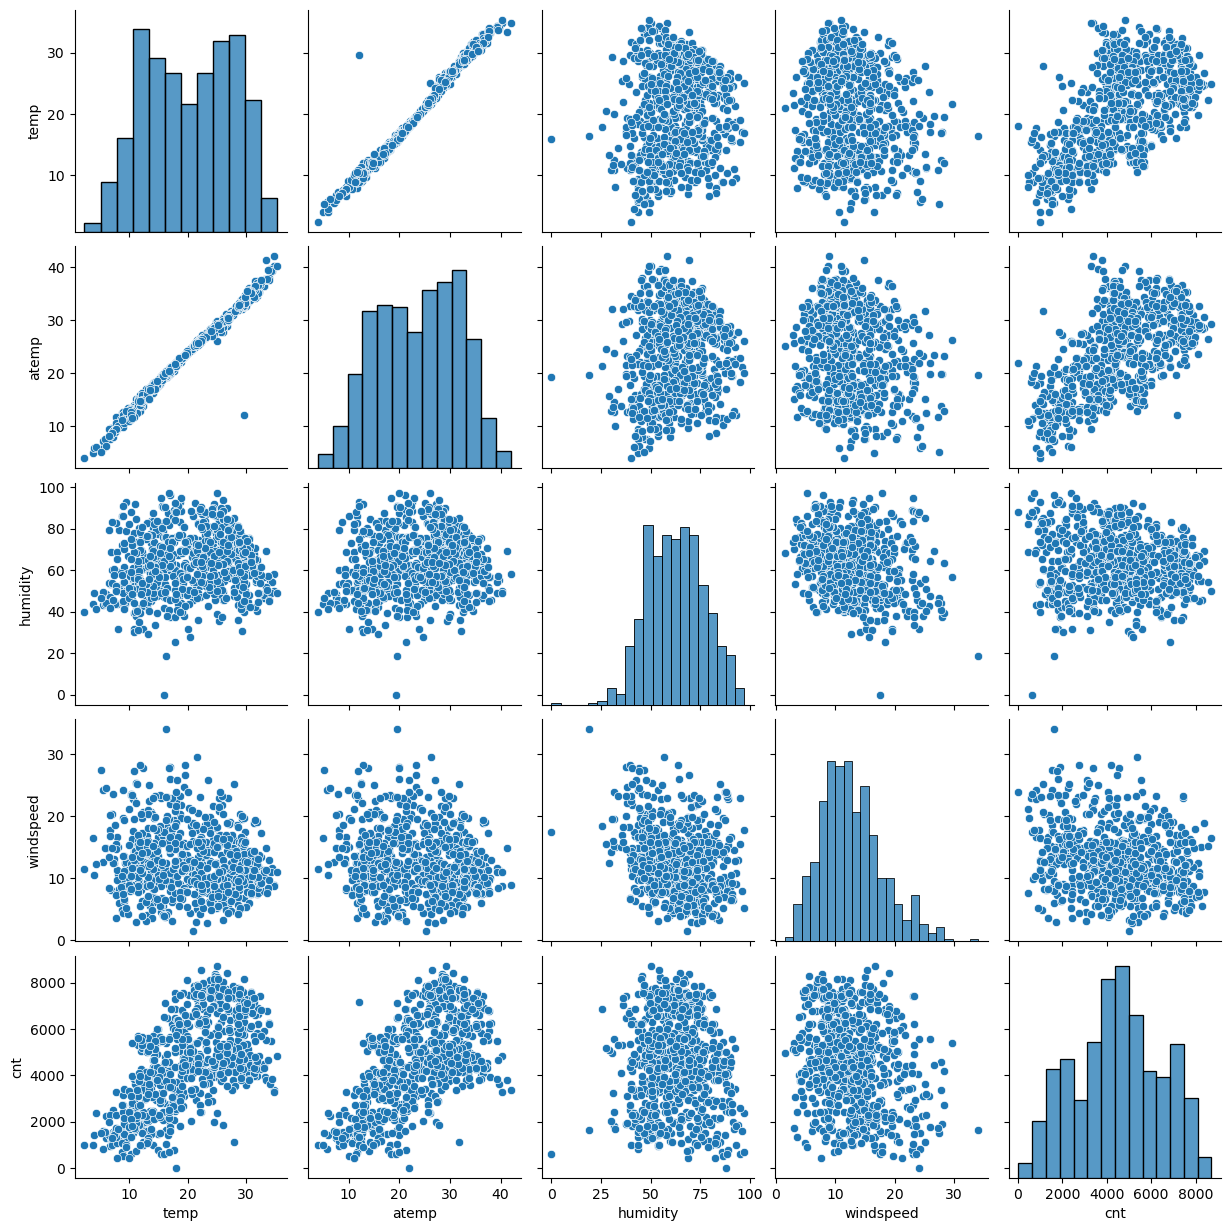

In [17]:
# pariplot numerical columns to understand correlation
numerical_columns = ["temp", "atemp", "humidity", "windspeed", "month", "cnt"]
sns.pairplot(bike[numerical_columns])
plt.show()

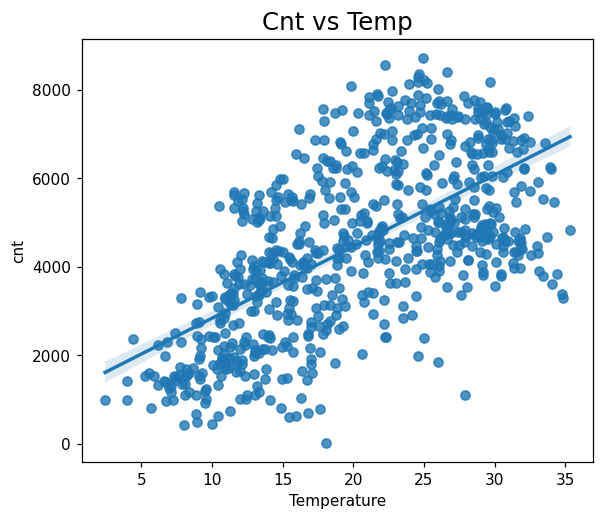

In [18]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

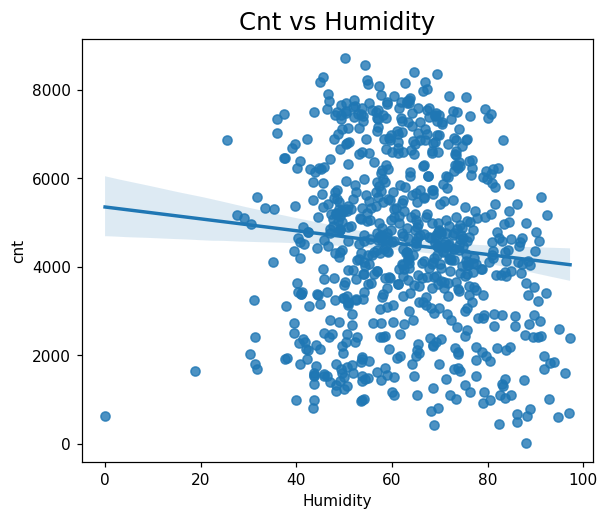

In [19]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=16)
sns.regplot(data=bike,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

### Inferences 

- cnt has good correlation with temp hence this might have good impact on our model
- cnt has good correlation with atemp similar to temp
- temp and atemp pattern looks similar hence we should verify the multicollinearity during VIF checks 
- temp has slight negative correlation with windpseed 
- humidity has negative correlation with windspeed 

### Visualising categorical variables

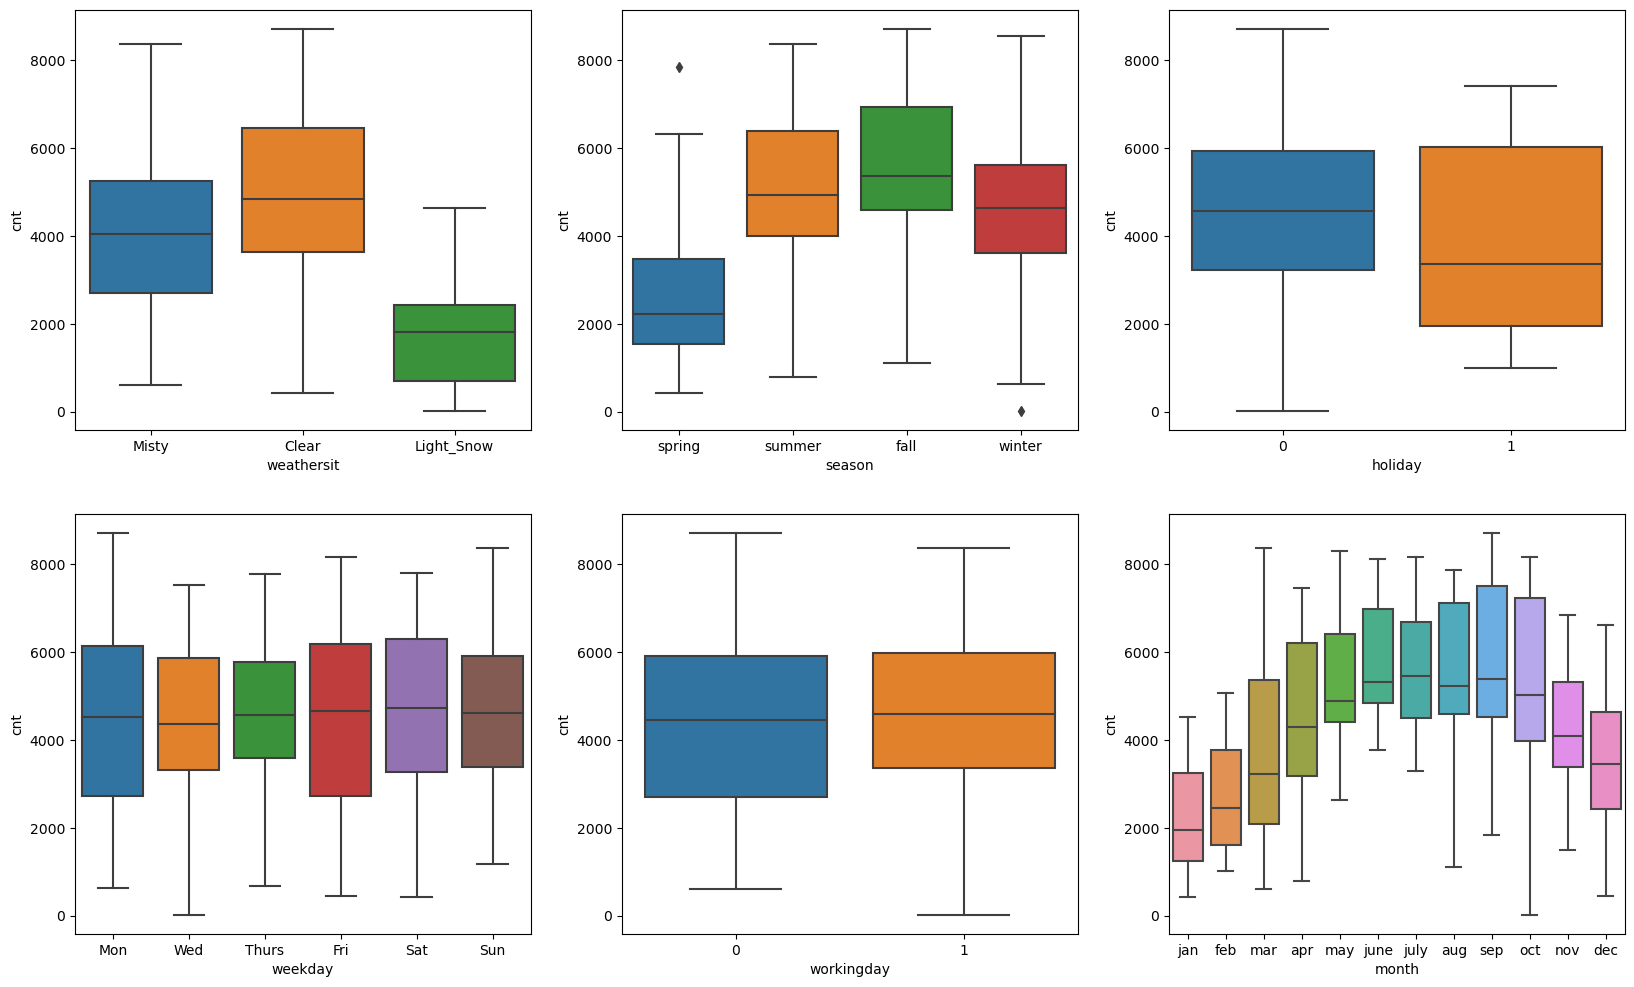

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y='cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y='cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y='cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y='cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y='cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'month', y='cnt', data = bike)
plt.show()

#### Inferences 
- Clearly the trend is high when there is clear weather (~ around 6k) with median of 5k 
- Fall and summer has high range of bike sharing with 75 percentile above 6k
- Saturday's and Monday seem to be high demand days
- Mid months of the year has high demand such as June, May which could correlate to the season 

### Multivariate and inferences 

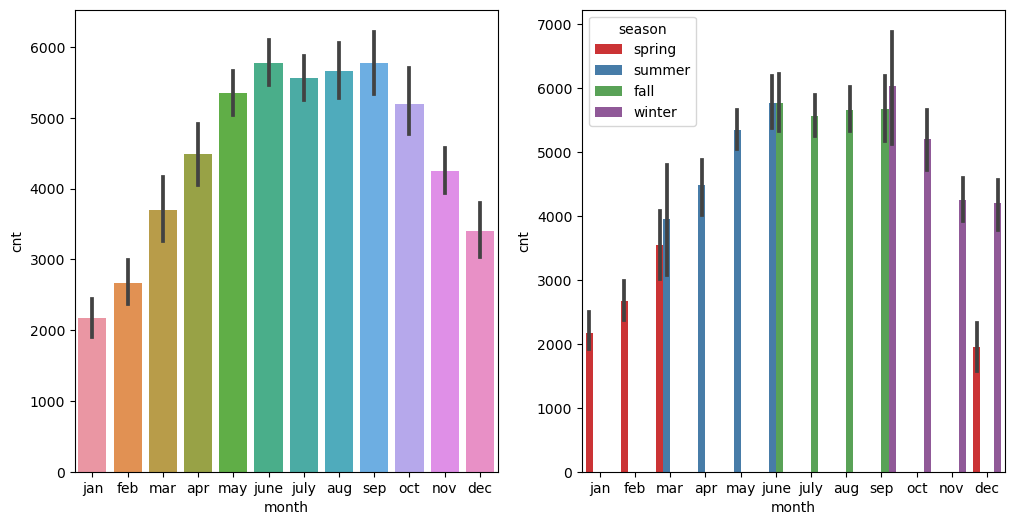

In [21]:
# season/month bi variate analysis
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('month','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('month','cnt',data=bike, hue='season',palette='Set1')
plt.show()

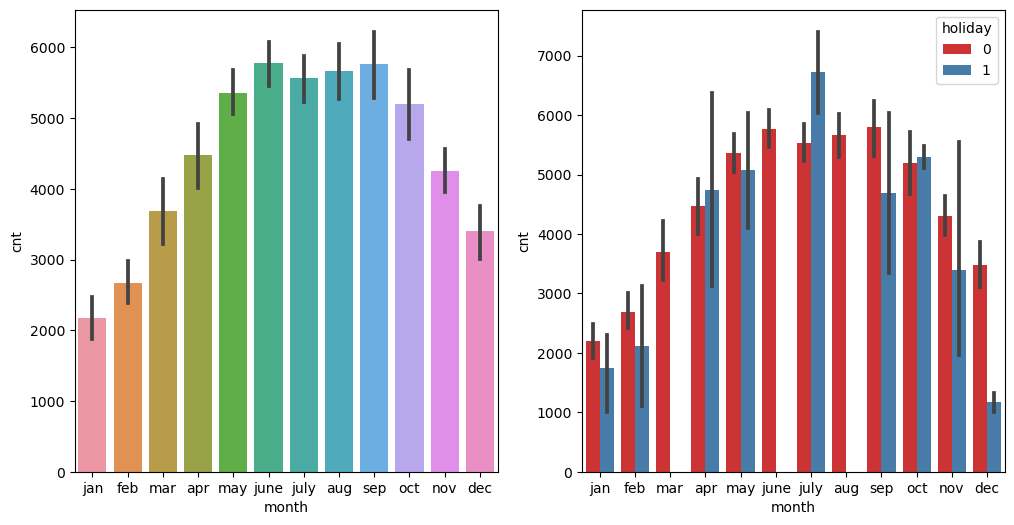

In [22]:
# season/month bi variate analysis
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('month','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('month','cnt',data=bike, hue='holiday',palette='Set1')
plt.show()

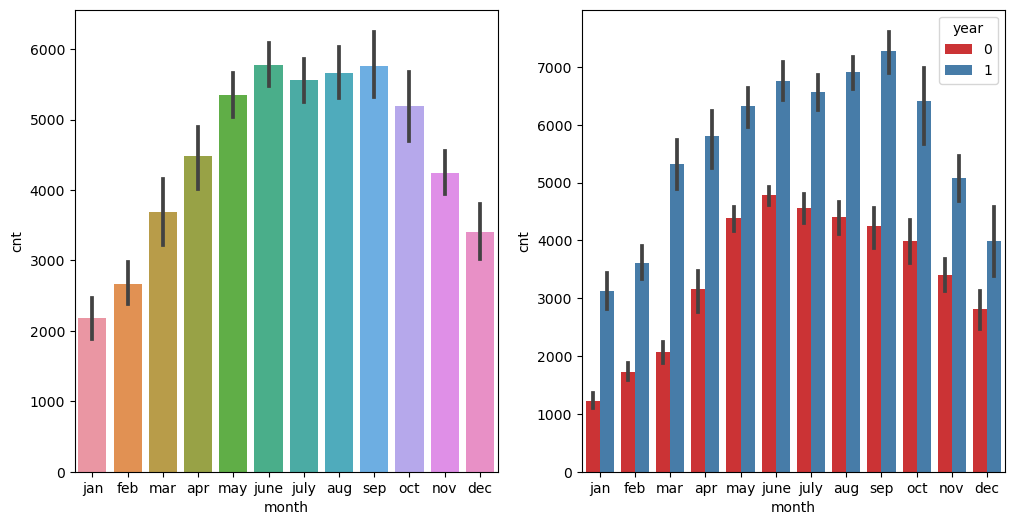

In [23]:
# year/Month uni variate and bi variate analysis
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('month','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('month','cnt',data=bike, hue='year',palette='Set1')
plt.show()

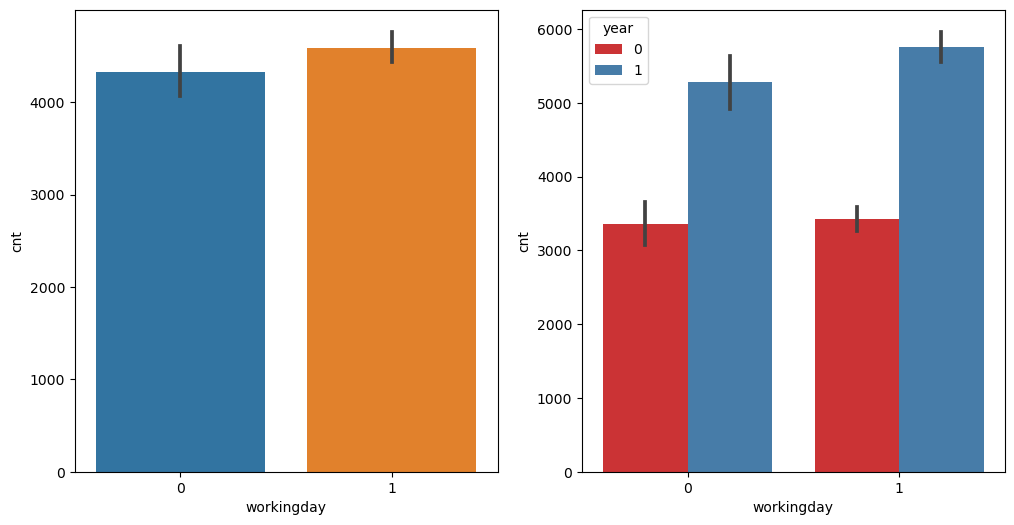

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike, hue='year',palette='Set1')
plt.show()

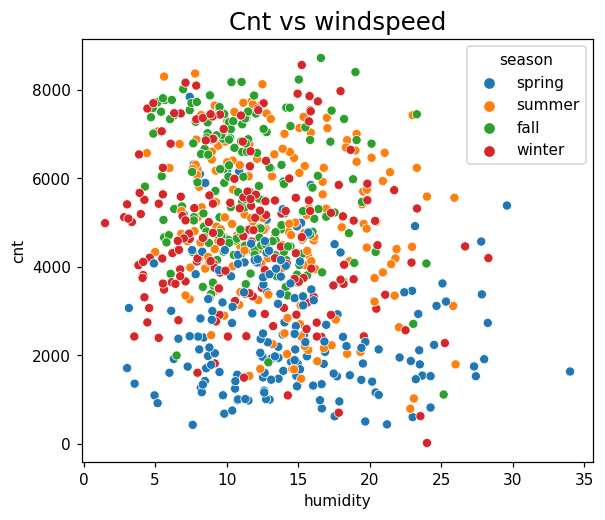

In [25]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs windspeed",fontsize=16)
sns.scatterplot(hue="season",data=bike,y="cnt",x="windspeed")
plt.xlabel("humidity")
plt.show()

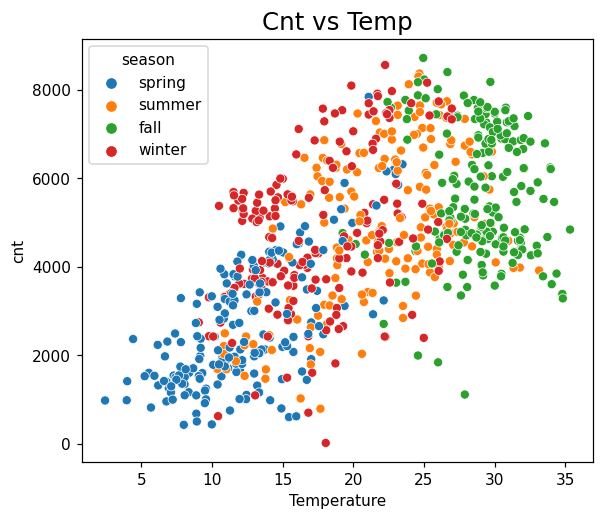

In [26]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.scatterplot(hue="season",data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### Inferences 
- Mid months clearly has high demand due to the season which proves our univariate analysis again
- Demand has increased in 2019 due to the post pandemic and all month in 2019 has higher deman than 2018 
- Working day has comparatively better demand than a holiday 

## Data Preparation

### Dumy variables 

In [27]:
# Let's drop the first column from status df using 'drop_first = True' , combine with one command 
season_df = pd.get_dummies(bike['season'], drop_first = True)
weathersit_df = pd.get_dummies(bike['weathersit'], drop_first = True)
month_df = pd.get_dummies(bike['month'], drop_first = True)
weekday_df = pd.get_dummies(bike['weekday'], drop_first = True)

In [28]:
# Add the results to the original day dataframe
bike = pd.concat([bike, season_df, month_df, weathersit_df, weekday_df], axis = 1)

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     625 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  july        730 non-null    u

In [30]:
# dropping unnecessary columns as we have already created dummy variable out of it.
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

## Splitting the Data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
bike_train.shape

(510, 29)

### Scaling the training data set

In [34]:
scaler = MinMaxScaler()

In [35]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,nov,oct,sep,Light_Snow,Misty,Mon,Sat,Sun,Thurs,Wed
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,1,0,0,0,0


In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Fit and transform the training the day using scaler 
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [37]:
# post scaling we can see max value is 1 for all coulumns
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,nov,oct,sep,Light_Snow,Misty,Mon,Sat,Sun,Thurs,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.086275,0.080392,0.029412,0.343137,0.154902,0.133333,0.127451,0.131373,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.281045,0.272166,0.169124,0.475223,0.362166,0.340268,0.333805,0.338139,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the model 

In [38]:
# Building the Linear Model
y_train = bike_train.pop('cnt')
X_train = bike_train

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   humidity    510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  aug         510 non-null    uint8  
 11  dec         510 non-null    uint8  
 12  feb         510 non-null    uint8  
 13  jan         510 non-null    uint8  
 14  july        510 non-null    uint8  
 15  june        510 non-null    uint8  
 16  mar         510 non-null    uint8  
 17  may         510 non-null    uint8  
 18  nov         510 non-null    uint8  
 19  oct         510 non-null    

### RFE 

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
# Verifying the response from RFE function for all features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('Light_Snow', True, 1),
 ('Misty', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 10),
 ('Thurs', False, 9),
 ('Wed', False, 8)]

In [42]:
# Extracting all columns picked by RFE
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'jan', 'july', 'sep', 'Light_Snow',
       'Misty', 'Mon'],
      dtype='object')

In [43]:
# Printing negated columns by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'Sat',
       'Sun', 'Thurs', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   humidity    510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    uint8  
 7   summer      510 non-null    uint8  
 8   winter      510 non-null    uint8  
 9   jan         510 non-null    uint8  
 10  july        510 non-null    uint8  
 11  sep         510 non-null    uint8  
 12  Light_Snow  510 non-null    uint8  
 13  Misty       510 non-null    uint8  
 14  Mon         510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(9)
memory usage: 32.4 KB


### Manual Elimination

In [47]:
# Building model for second time after dropping humidity 
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.31e-191
Time:                        23:55:47   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [48]:
#  checking VIF with RFE selected variables 
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
13,Misty,2.29
0,year,2.09
14,Mon,1.98


In [49]:
# As humidity shows high VIF values hence we can drop it and taking new variable X_train_new
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,year,2.08
7,winter,1.99
13,Mon,1.97
8,jan,1.62
9,july,1.59


In [50]:
# Building model for second time after dropping humidity 
X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          7.33e-189
Time:                        23:55:47   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [51]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,year,2.08
7,winter,1.99
13,Mon,1.97
8,jan,1.62
9,july,1.59


In [52]:
# Dropping holiday as it has slighly high p value than others 
X_train_new.drop(['workingday'], axis = 1, inplace=True)

In [53]:
# Building third model for second time after dropping workingday 
X_train_lm3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.21e-186
Time:                        23:55:48   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.030      6.986      0.0

In [54]:
# Dropping holiday as it has slighly high p value than others 
X_train_new.drop(['Mon'], axis = 1, inplace=True)

In [55]:
# Building fourth model for second time after dropping workingday 
X_train_lm4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          3.97e-187
Time:                        23:55:48   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

In [56]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,year,2.07
6,winter,1.79
7,jan,1.61
8,july,1.59
11,Misty,1.56
9,sep,1.34


In [57]:
# Dropping holiday as it has slighly high p value than others 
X_train_new.drop(['windspeed'], axis = 1, inplace=True)

In [58]:
# Building fifth model for second time after dropping workingday 
X_train_lm5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.92e-180
Time:                        23:55:48   Log-Likelihood:                 482.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     498   BIC:                            -890.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1587      0.030      5.296      0.0

In [59]:
# Dropping holiday as it has slighly high p value than others 
X_train_new.drop(['jan'], axis = 1, inplace=True)

In [60]:
# Building sixth model for second time after dropping workingday 
X_train_lm6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.80e-181
Time:                        23:55:48   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

### So the model we predicted is given below

_cnt = 0.1503 + 0.5034 x temp + 0.2325 x year - 0.1008 x holiday - 0.0764 x spring + 0.0355 x summer 
       + 0.0842 x winter - 0.0527 x july + 0.0810 x sep - 0.2999 x Light_Snow - 0.0798 x Misty_ 


In [61]:
X_train_lm6

,const,year,holiday,temp,spring,summer,winter,july,sep,Light_Snow,Misty
653,1.0,1,0,0.509887,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0,1,0,0,0,0,1
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0,0,1,0,0,0,1


In [62]:
y_train_pred = lr_6.predict(X_train_lm6) 

##  Residual analysis

### Linearity 

In [63]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_train_pred)))

R squared: 0.8243232417031895


#### Training and Predicted R squared is 82% so we are good here

###  Check for Normality of error terms/residuals¶

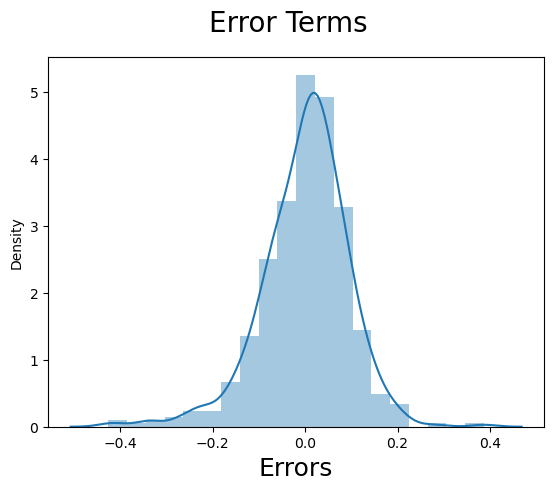

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [65]:
### The scientific way for the mean of residuals 
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.5606967526795524e-15


#### Close to zero hence all good here

### Multicollinearity

In [66]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.22
0,year,2.06
4,summer,1.93
5,winter,1.58
6,july,1.58
9,Misty,1.55
3,spring,1.40
7,sep,1.34
8,Light_Snow,1.07
1,holiday,1.04


#### VIF value is lesser than the 5 for all the feature we chose hence we are good here

### Homoscedasticity

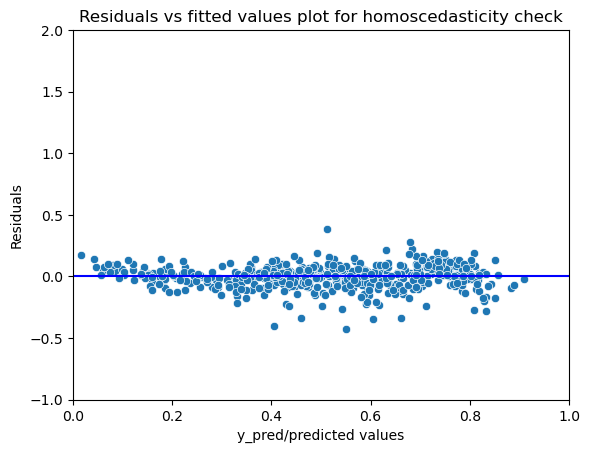

In [67]:
p = sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,2)
plt.xlim(0,1)
p = sns.lineplot([0,2],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

#### The residuals have equal or almost equal variance across the regression line.

##  Making Predictions

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Fit and transform the training the day using scaler 
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [69]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,nov,oct,sep,Light_Snow,Misty,Mon,Sat,Sun,Thurs,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.073059,0.082192,0.086758,0.027397,0.319635,0.118721,0.164384,0.178082,0.164384,0.127854
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.260830,0.275286,0.282125,0.163612,0.467403,0.324202,0.371472,0.383458,0.371472,0.334692
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Lets create X and Y axis value from test set
y_test = bike_test.pop('cnt')
X_test = bike_test

In [71]:
# Lets extract all the trained columns 
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [72]:
# Predicting the model for test set 
y_pred = lr_6.predict(X_test_lm_6)

In [73]:
# print r square value of test data
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.80898

In [74]:
# Print the adjusted_r2 for test set
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7998


##  Model evaluation

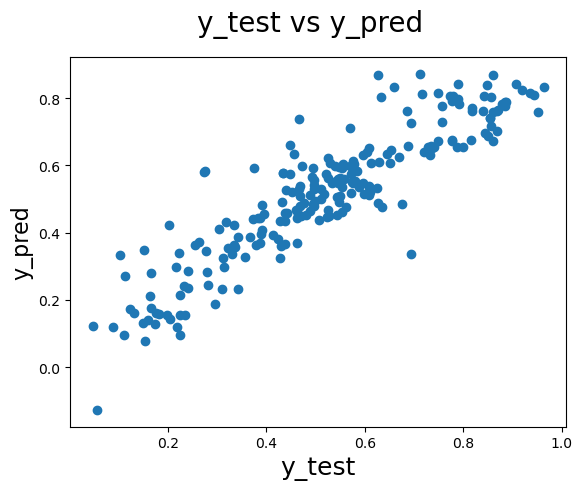

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Final values and conclusion

- Train dataset R^2          : 0.824
- Test dataset R^2           : 0.8089
- Train dataset Adjusted R^2 : 0.821    
- Test dataset Adjusted R^2  : 0.7998

### Based on our model bike demand depends upon temp, year, spring, summer, winter, sep, holiday, july, Light_Snow and Misty